# Usage Examples
## SlopePatches

The `SlopePatches` object is the tool to work with slope patches: understanding the parameters of distinct patches and stretch zones, and calculating the elevation of the river.

You can import this class using

In [1]:
from bguriver.slope_patches import SlopePatches

To define the SlopePatches we should define the slope exponent `n` as `float`, the time moments, when patches start `patch_starts`, and the uplift rates on these patches `uplift_rates`, they should be lists (or arrays) of the same length.

In [2]:
# define the patches starts, the corresponding uplift rates and the exponent on channel slope
patch_starts = [0.0, 1.0, 5.0, 8.5]
uplift_rates = [2.1, 0.4, 1.9, 0.6]
n = 0.67

# create SlopePatches object
slp = SlopePatches(patch_starts, uplift_rates, n)


This object will have the attributes with same names:

In [3]:
# SlopePatches attributes
print(f'slp.patch_starts = {slp.patch_starts}')
print(f'slp.uplift_rates = {slp.uplift_rates}')
print(f'slp.n = {slp.n}')

slp.patch_starts = [0.  1.  5.  8.5]
slp.uplift_rates = [2.1 0.4 1.9 0.6]
slp.n = 0.67


You can get the number of patches using the `SlopePatches.count()` method:

In [4]:
# look at the number of patches
N = slp.count()
print(f'slp.count() = {N}')

slp.count() = 4


You can find the elevation at the moment `tau` in the point `chi` using `SlopePatches.get_elevation` method.

You also can define which patch or stretch zone this elevation corespond using `SlopePatches.get_elevation_index` method.This method will return the index. Indices less than `slp.count()` corespond the patches, and other corespond the stretch zones.

In [5]:
tau, chi = 4, 3

# get elevation for tau and chi
lam = slp.get_elevation(tau, chi)

# get elevation index for tau and chi
ilam = slp.get_elevation_index(tau, chi)

print(f'lam(tau={tau:.2f}, chi={chi:.2f}) = {lam:.2f}')
print(f'index(tau={tau:.2f}, chi={chi:.2f}) = {ilam}')

lam(tau=4.00, chi=3.00) = 3.98
index(tau=4.00, chi=3.00) = 0


You can also use these methods with `tau` and `chi` as arrays or tensors.

Here is the example of calculating the elevation over square grid.

tau.shape = (64, 64)
chi.shape = (64, 64)
lam.shape = (64, 64)


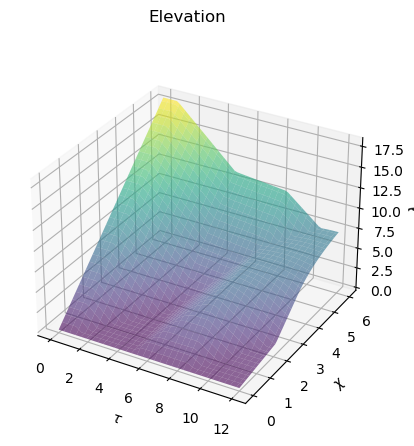

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# generate 2-dimensional tau and chi
tau = np.linspace(0, 12, 64)
chi = np.linspace(0, 6, 64)
tau, chi = np.meshgrid(tau, chi)
print(f'tau.shape = {tau.shape}')
print(f'chi.shape = {chi.shape}')

# get elevation for tau and chi
lam = slp.get_elevation(tau, chi)
print(f'lam.shape = {lam.shape}')

# plot the elevation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.suptitle('Elevation')
ax.plot_surface(tau, chi, lam, cmap='viridis', alpha=0.6)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\chi$')
ax.set_zlabel(r'$\lambda$')
plt.savefig('../pics/guide-elevation.png')

We can find the patches and stretch zones realisation bordesr using `SlopePatches.get_patches_relisation_borders` and `SlopePatches.get_stretch_zones_relisation_borders` methods.

In [7]:
tau = 8

# find patches realisation borders
realisation_patches_lefts, realisation_patches_rights = slp.get_patches_relisation_borders(tau)
print(f'realisation_patches_lefts.shape = {realisation_patches_lefts.shape}')
print(f'realisation_patches_rights.shape = {realisation_patches_rights.shape}')
print()

# find stretch zones realisation borders
realisation_stretch_lefts, realisation_stretch_rights = slp.get_stretch_zones_relisation_borders(tau)
print(f'realisation_stretch_lefts.shape = {realisation_stretch_lefts.shape}')
print(f'realisation_stretch_rights.shape = {realisation_stretch_rights.shape}')
print()

# represent the realisation borders as a table
import pandas as pd

pd.DataFrame({'Left': np.concatenate([realisation_patches_lefts, realisation_stretch_lefts]), 
              'Right': np.concatenate([realisation_patches_rights, realisation_stretch_rights]),}, 
             index=np.concatenate([np.char.add('Patch ', np.arange(slp.count()).astype(str)), 
                                   np.char.add('Stretch Zone ', np.arange(slp.count() - 1).astype(str))]))

realisation_patches_lefts.shape = (4,)
realisation_patches_rights.shape = (4,)

realisation_stretch_lefts.shape = (3,)
realisation_stretch_rights.shape = (3,)



,Left,Right
Patch 0,4.293444,inf
Patch 1,3.156431,4.293444
Patch 2,0.000000,1.465209
Patch 3,NaN,NaN
Stretch Zone 0,NaN,NaN
Stretch Zone 1,1.465209,3.156431
Stretch Zone 2,NaN,NaN


These methods also can be used non-scalar `tau`:

tau.shape = (100,)

realisation_patches_lefts.shape = (4, 100)
realisation_patches_rights.shape = (4, 100)

realisation_stretch_lefts.shape = (3, 100)
realisation_stretch_rights.shape = (3, 100)



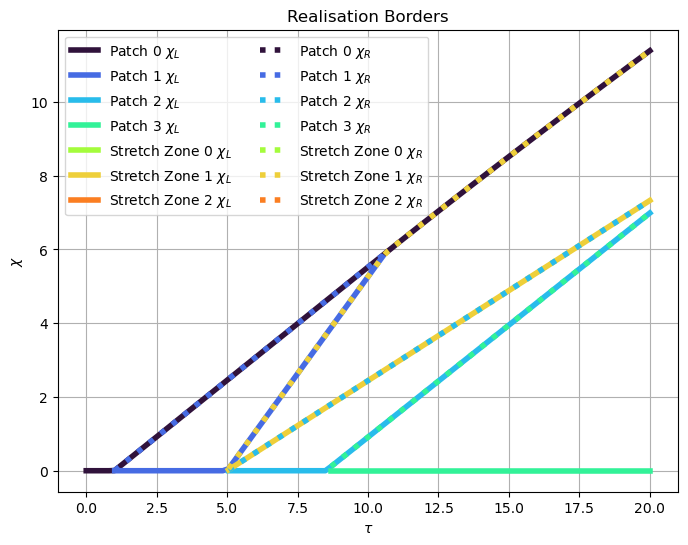

In [8]:
# generate array of moments tau
tau = np.linspace(0, 20, 100)
print(f'tau.shape = {tau.shape}')
print()

# find patches realisation borders
realisation_patches_lefts, realisation_patches_rights = slp.get_patches_relisation_borders(tau)
print(f'realisation_patches_lefts.shape = {realisation_patches_lefts.shape}')
print(f'realisation_patches_rights.shape = {realisation_patches_rights.shape}')
print()

# find stretch zones realisation borders
realisation_stretch_lefts, realisation_stretch_rights = slp.get_stretch_zones_relisation_borders(tau)
print(f'realisation_stretch_lefts.shape = {realisation_stretch_lefts.shape}')
print(f'realisation_stretch_rights.shape = {realisation_stretch_rights.shape}')
print()

# plot the result
import matplotlib.cm as cm

plt.figure(figsize=(8, 6))
plt.title('Realisation Borders')
for i in range(slp.count()):
    color = cm.turbo(0.5*i/slp.count())
    plt.plot(tau, realisation_patches_lefts[i], color=color, linewidth=4, linestyle='-', label=f'Patch {i} $\\chi_L$')
for i in range(slp.count() - 1):
    color = cm.turbo(0.5 + 0.5*i/slp.count())
    plt.plot(tau, realisation_stretch_lefts[i], color=color, linewidth=4, linestyle='-', label=f'Stretch Zone {i} $\\chi_L$')
for i in range(slp.count()):
    color = cm.turbo(0.5*i/slp.count())
    plt.plot(tau, realisation_patches_rights[i], color=color, linewidth=4, linestyle=':', label=f'Patch {i} $\\chi_R$')
for i in range(slp.count() - 1):
    color = cm.turbo(0.5 + 0.5*i/slp.count())
    plt.plot(tau, realisation_stretch_rights[i], color=color, linewidth=4, linestyle=':', label=f'Stretch Zone {i} $\\chi_R$')
plt.grid(True)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi$')
plt.legend(ncol=2)
plt.savefig('../pics/guide-borders.png')

The slope patches are needed to describe the solution of the equation (8) from the [article](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/jgrf.20031).

To get the value of $\nu$, defined the `SlopePatches` object,  we can use `SlopePatches.get_nu_value` method:

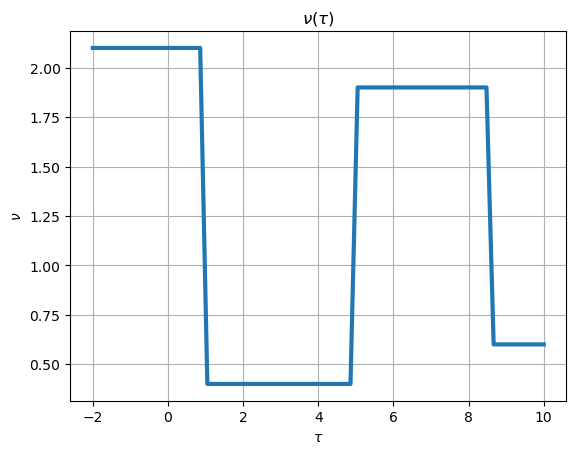

In [9]:
# define tau values
tau = np.linspace(-2, 10, 64)

# find nu(tau)
nu = slp.get_nu_value(tau)

# plot nu function
plt.title(r'$\nu(\tau)$')
plt.plot(tau, nu, linewidth=3)
plt.grid(True)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\nu$')
plt.savefig('../pics/guide-nu.png')

You can see more methods of `SlopePatches` in the [Long Guide notebook](https://github.com/zimfv/river-profiles/blob/main/notebooks/Guide%20Long.ipynb).


# Approximations
To approximate the equation (8) from the [article](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/jgrf.20031) with given `nu`-function and `initial` and `border` functions, you can use the `approximate` function from the `bguriver.approximation` module.

sol.shape = (200, 150)
tau.shape = (200, 150)
chi.shape = (200, 150)


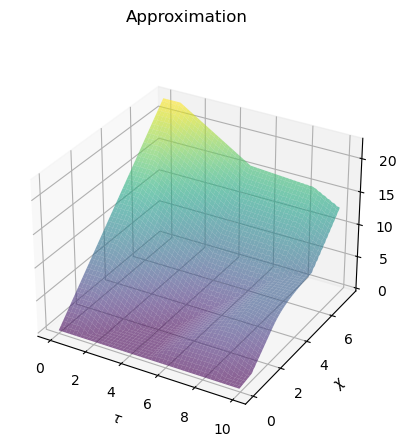

In [10]:
from bguriver.approximation import approximate

# define the slope eponent
n = slp.n

# define nu, initial and border functions
nu = slp.get_nu_value
initial = lambda chi: chi*slp.get_slopes()[0] # we sopouse, that nu(0) define the initial solution
border = lambda tau: tau*0

# define approximation parameters
dtau = 0.05
ntau = 200
dchi = 0.05
nchi = 150

# approximate the soulution
sol, tau, chi = approximate(nu, initial, border, n, 
                            dtau=dtau, ntau=ntau, 
                            dchi=dchi, nchi=nchi)

# print the result shaes
print(f'sol.shape = {sol.shape}')
print(f'tau.shape = {tau.shape}')
print(f'chi.shape = {chi.shape}')

# plot the result
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.suptitle('Approximation')
ax.plot_surface(tau, chi, sol, cmap='viridis', alpha=0.6)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\chi$')
ax.set_zlabel(r'$\lambda$')
plt.savefig('../pics/guide-approximation.png')

You can use a [tqdm](https://tqdm.github.io/) bar to look at the approximation progress.

If you are going to use this in the script, you should import:

In [11]:
from tqdm import tqdm

And if you are going to use this in notebook, you should import:

In [12]:
from tqdm.notebook import tqdm

The approximation contains `(ntau-1)*(nchi - 1)` iterations.

In [13]:
# we can use the bar to loook at the process
with tqdm(total=(ntau-1)*(nchi - 1)) as bar:
    # approximate the soulution
    sol, tau, chi = approximate(nu, initial, border, n, 
                                dtau=dtau, ntau=ntau, 
                                dchi=dchi, nchi=nchi, 
                                bar=bar)

# print the result shaes
print(f'sol.shape = {sol.shape}')
print(f'tau.shape = {tau.shape}')
print(f'chi.shape = {chi.shape}')

  0%|          | 0/29651 [00:00<?, ?it/s]

sol.shape = (200, 150)
tau.shape = (200, 150)
chi.shape = (200, 150)


# Recomendations
## Animations
If you want to generate an animation, you can use an [imageio](https://pypi.org/project/imageio/)-package.

The first you should draw the frames:

In [14]:
from PIL import Image

# get an analytical elevation same shape as approximation
lam = slp.get_elevation(tau, chi)

# define the number of frames in the animation
frames = 60

# define the list containing drawn frames
images = []

# fill that list
for itau in np.linspace(0, lam.shape[0] - 1, frames).astype(int):
    fig, ax = plt.subplots(1)
    
    # make the title containing time
    tau_value = tau[itau, 0]
    ax.set_title(f'$\\tau = {tau_value:.2f}$')
    
    # plot the apporximation
    ax.plot(chi[itau], sol[itau], label='Approximation')
    
    # plot the analytical solution by SlopePatches
    ax.plot(chi[itau], sol[itau], label='SlopePatches')
    
    # draw an image
    fig.canvas.draw()
    
    # add the image to images
    images.append(Image.frombytes('RGB', fig.canvas.get_width_height(),fig.canvas.tostring_rgb()))
    
    # close and del figure from the memory
    plt.close('all')
    del fig
    
print(f'len(images) = {len(images)}')

len(images) = 60


If you want to generate a gif animation, you can use `imageio.mimsave` function:
```python
import imageio as io

filename = 'some/path/file.gif'
io.mimsave(filename, images, fps=12, loop=0)
```

If you want to generate a mp4 video, you can use `imageio.get_writer` object:
```python
filename = 'some/path/file.mp4'
with io.get_writer(filename, format='FFMPEG', mode='I', fps=12) as writer:
    for img in tqdm(images):
        writer.append_data(np.array(img))
```